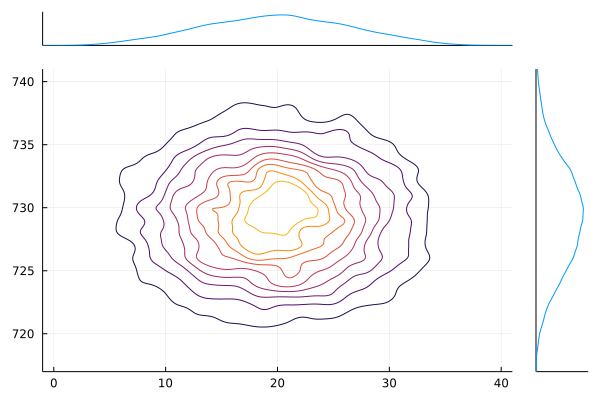

In [114]:
using DataFrames, CSV
using Plots
data_700 = CSV.read("sensor_data_700.txt", DataFrame, header=["date", "time", "ir", "lidar"], delim=' ')

d = subset(data_700, :time => a -> a .>= 120000, :time => a -> a .< 160000) # 12時から16時までのデータだけ抽出
using StatsPlots
marginalkde(d.ir, d.lidar)

In [115]:
using Statistics
println("光センサの計測値の分散 ", var(d.ir, corrected=true))
println("LIDARの計測値の分散 ", var(d.lidar, corrected=true))

diff_ir = d.ir .- mean(d.ir)
diff_lidar = d.lidar .- mean(d.lidar)

a = diff_ir .* diff_lidar
println("共分散: ", sum(a)/(size(d)[1]-1))

println("ir mean: ", mean(d.ir))
println("lidar mean: ", mean(d.lidar))

光センサの計測値の分散 42.117126367701594
LIDARの計測値の分散 17.702026469211454
共分散: -0.31677803385437064
ir mean: 19.860246913580248
lidar mean: 729.3119576719577


In [116]:
println(cov(d.ir))
println(cov(d.lidar))
println(cov(d.ir, d.lidar))

42.117126367701594
17.702026469211454
-0.3167780338543696


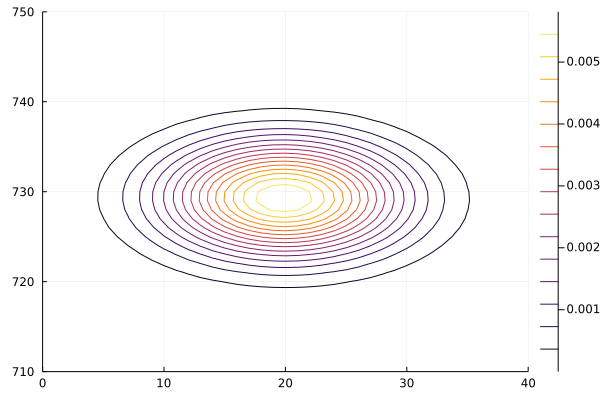

In [117]:
using Distributions
mu = [mean(d.ir), mean(d.lidar)]
sigma = [cov(d.ir) cov(d.ir, d.lidar); cov(d.ir, d.lidar) cov(d.lidar)]
mvnorm = MvNormal(mu, sigma)

x_data = collect(0:40)
y_data = collect(710:750)
z_data = [pdf(mvnorm,[x,y]) for y in y_data, x in x_data] # xとyの順番の注意
plot(x_data, y_data, z_data) # 2D
#plot(x_data, y_data, z_data, st=:surface) # 3D
#contourf(x_data, y_data, z_data, color=:viridis)

In [118]:
println("x座標", x_data)
println("y座標", y_data)

x座標[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
y座標[710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750]


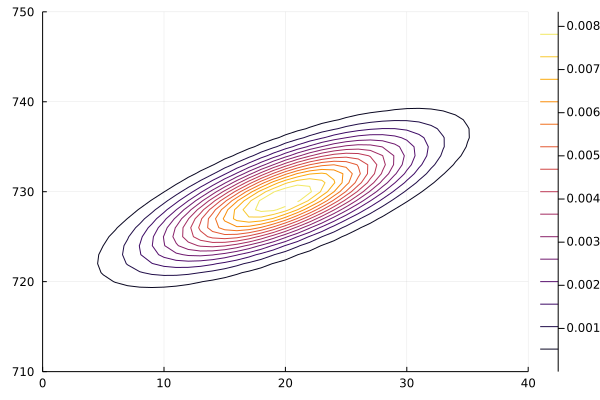

In [119]:
mu = [mean(d.ir), mean(d.lidar)]
sigma = [cov(d.ir) cov(d.ir, d.lidar)+20; cov(d.ir, d.lidar)+20 cov(d.lidar)]
mvnorm = MvNormal(mu, sigma)

x_data = collect(0:40)
y_data = collect(710:750)
z_data = [pdf(mvnorm,[x,y]) for y in y_data, x in x_data]
plot(x_data, y_data, z_data) # 2D